In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import composite
import query_db
import os

In [2]:
# method to gather wavelength and flux data from SN files
def get_spectra(sn_name, directory = ''):
    filename = '../../SN_Only_Master_Catalog/' + directory + 'SN' + sn_name + ".json"
    with open (filename) as f:
        data = json.load(f)
        snid = tuple(data.keys())[0]
#         print data[snid]
        if 'spectra' in data[snid]:
            spectra = data[snid]['spectra']
            wavelengths = []
            fluxes = []
            for s in spectra:
                print s
                wavelength = [float(data_list[0]) for data_list in s['data']]
                flux = [float(data_list[1]) for data_list in s['data']]
                wavelengths.append(wavelength)
                fluxes.append(flux)
        minwave = wavelengths[0]
        maxwave = wavelengths[-1]
    for i, wave in enumerate(wavelengths):
        plt.plot(wave, fluxes[i])
        plt.show()
        # error = [data_list[2] for data_list in data[snid]['spectra'][0]['data']]
        # else return
        # file_key = file.split('\\')[-1][:-5]
        # data = data.get(file_key)
        
def get_minmax(sn_name, directory = ''):
    filename = '../../SN_Only_Master_Catalog/' + directory + 'SN' + sn_name + ".json"
    with open (filename) as f:
        data = json.load(f)
        snid = tuple(data.keys())[0]
        if 'spectra' in data[snid]:
            spectra = data[snid]['spectra']
            wavelengths = []
            for s in spectra:
                wavelength = [float(data_list[0]) for data_list in s['data']]
                wavelengths.append(wavelength)
            minwave = wavelengths[0]
            maxwave = wavelengths[-1]
        return minwave, maxwave

In [3]:
query = "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN" 
SN_Array = composite.grab(query, multi_epoch = True, make_corr = False)

ERROR:  1998bu_19990126_0_2_00.dat None
ERROR:  2002bo_20020313_3360_7726_00.dat None
ERROR:  2002bo_20020314_0_2_00.dat None
ERROR:  2002bo_20020403_0_2_00.dat None
ERROR:  2002bo_20020421_0_2_00.dat None
ERROR:  2002bo_20020518_0_2_00.dat None
ERROR:  2003hv_20040901_51567_151964_00.dat None
ERROR:  sn2006oa-20061116-not.dat None
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
ERROR:  sn1992a-19920116.220-iue.flm None
4995 valid SNe found
Arrays cleaned


In [4]:
attributes = dir(SN_Array[0])
print attributes

['B_minus_V', 'Bmag_salt', 'Bmag_salt2', 'Ebv_host', 'GasRich', 'SNR', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'av_25', 'av_mlcs17', 'av_mlcs31', 'bias_lc', 'c_lc', 'c_salt', 'c_salt2', 'carbon', 'cov_mb_c_lc', 'cov_mb_s_lc', 'cov_s_c_lc', 'csp_light_curves', 'czCMB_host', 'czLG_host', 'cz_host', 'dec', 'delta_mlcs17', 'delta_mlcs31', 'dm15', 'dm15_array', 'dm15_from_fits', 'dm15_source', 'e_Bmag_salt', 'e_Bmag_salt2', 'e_av_mlcs17', 'e_av_mlcs31', 'e_c_lc', 'e_c_salt', 'e_c_salt2', 'e_delta_mlcs17', 'e_delta_mlcs31', 'e_dm15', 'e_logMst_lc', 'e_mb_lc', 'e_mu_mlcs17', 'e_mu_mlcs31', 'e_mu_salt', 'e_mu_salt2', 'e_s_salt', 'e_tmax_lc', 'e_v', 'e_x1_lc', 'e_x1_salt2', 'e_zCMB_mlcs17', 'e_zCMB_mlcs31', 'e_zCMB_salt', 'e_zCMB_salt2', 'filename', 'filt_host', 'flux', 'glat_host', 'gl

In [5]:
names = []
sn07jg_spectra = []
for SN in SN_Array:
    names.append(SN.name)
    if SN.name == '2007jg':
        sn07jg_spectra.append(SN)
    print SN.name, SN.filename
unames = set(names)
print unames
print len(unames)

for SN in sn07jg_spectra:
    print SN.filename

1989a sn1989a-19890427-o1i1.flm
1989b sn1989b-19890215.flm
1989b sn1989b-19890221.flm
1989b sn1989b-19890427-o1i1.flm
1989b sn1989b-19890710-o.flm
1989m sn1989m-19890709-oi1i2.flm
1989m sn1989m-19890710-oi1i2.flm
1989m sn1989m-19891201-oi.flm
1989m sn1989m-19900501-opt.flm
1990g sn1990g-19900325-oi.flm
1990m sn1990m-19900401-opt.flm
1990m sn1990m-19900717-oi.flm
1990m sn1990m-19900731-oi.flm
1990m sn1990m-19900829-oi.flm
1990m sn1990m-19900830-ir2.flm
1990n sn1990n-19900717-oi.flm
1990n sn1990n-19900731-oi.flm
1990n sn1990n-19900829-oi.flm
1990n sn1990n-19900830-ir2.flm
1990n sn1990n-19901217-opt2.flm
1990o sn1990o-19900717-opt2.flm
1990o sn1990o-19900731-opt2.flm
1990o sn1990o-19900829-opt2.flm
1990r sn1990r-19900717-opt2.flm
1990r sn1990r-19900731-opt2.flm
1990r sn1990r-19900829-opt2.flm
1990y sn1990y-19900830-opt2.flm
1991ak sn1991ak-19910720-final.flm
1991ak sn1991ak-19910805-final.flm
1991ak sn1991ak-19910820-final.flm
1991am sn1991am-19910804-final.flm
1991at sn1991at-19910916-fi

2000dn 0.032065
3640.0 7520.5


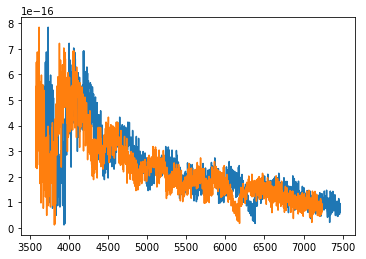

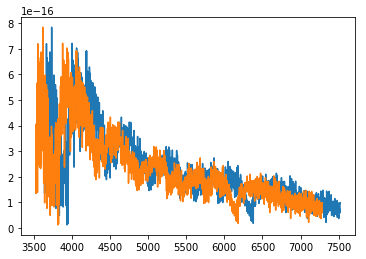

In [6]:
ex = SN_Array[2000] 
print ex.name, ex.redshift
print ex.minwave, ex.maxwave
plt.plot(ex.wavelength[ex.x1:ex.x2]*(1.+ex.redshift), ex.flux[ex.x1:ex.x2])
plt.plot(ex.wavelength[ex.x1:ex.x2], ex.flux[ex.x1:ex.x2])
plt.show()
plt.plot(ex.wavelength*(1.+ex.redshift), ex.flux)
plt.plot(ex.wavelength, ex.flux)
plt.show()
compare_wave = ex.wavelength[ex.x1:ex.x2]*(1.+ex.redshift)

{u'u_wavelengths': u'Angstrom', u'source': u'6,10,14', u'u_errors': u'ergs/s/cm^2/Angstrom', u'filename': u'sn2000dn-20000929.29-fast.flm', u'instrument': u'fast', u'u_time': u'MJD', u'time': u'51816.29', u'data': [[u'3720.00', u'5.9636996e-16', u'7.9871056e-17'], [u'3721.50', u'7.5865501e-16', u'8.2279131e-17'], [u'3723.00', u'7.3943102e-16', u'8.0463053e-17'], [u'3724.50', u'7.2086104e-16', u'7.9205263e-17'], [u'3726.00', u'7.0619e-16', u'7.763053e-17'], [u'3727.50', u'7.0937596e-16', u'7.7818507e-17'], [u'3729.00', u'6.7963499e-16', u'7.7712026e-17'], [u'3730.50', u'7.1688199e-16', u'7.7615737e-17'], [u'3732.00', u'7.3271902e-16', u'7.7918675e-17'], [u'3733.50', u'6.6984901e-16', u'7.709326e-17'], [u'3735.00', u'6.22008e-16', u'7.6111026e-17'], [u'3736.50', u'6.5466001e-16', u'7.5940933e-17'], [u'3738.00', u'6.9239999e-16', u'7.5816687e-17'], [u'3739.50', u'6.3303002e-16', u'7.4204094e-17'], [u'3741.00', u'6.4083305e-16', u'7.445763e-17'], [u'3742.50', u'6.7858901e-16', u'7.5305087e

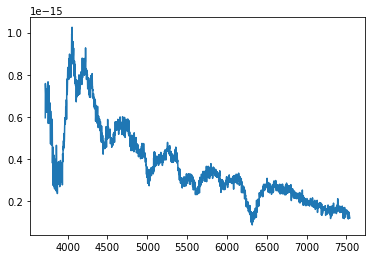

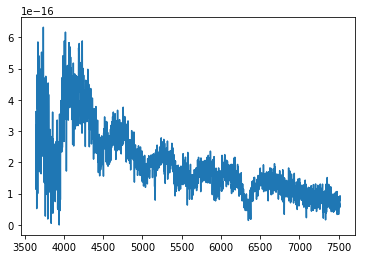

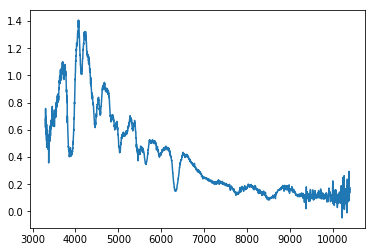

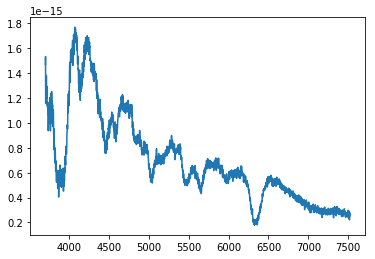

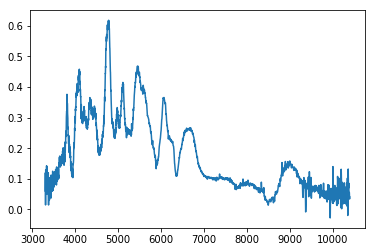

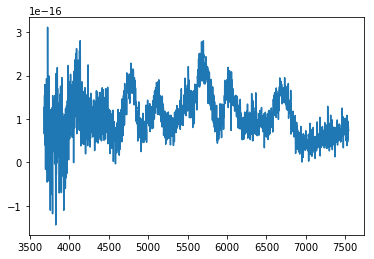

In [7]:
import glob
get_spectra(ex.name, directory = 'SN_Only_2000-2004/')

In [21]:
def spec_analysis():
    # method to compare the spectra of SN in database to SN in OSC
    # Query DB, getting a list of objects about supernovae
    query = "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN" 
    SN_Array = composite.grab(query, multi_epoch = True, make_corr = False)
    
    for SN in SN_Array:
        json_minwave, json_maxwave = get_minmax(SN.name)
            if -10 < SN.maxwave - json_maxwave < 10 and -10 < SN.minwave - json_minwave < 10
                
            
            
    directory = '../../SN_Only_Master_Catalog/'
    in_db = set()
    in_files = set()
    for three_tuple in os.walk(directory):
        files = three_tuple[2]
        for file in files:
            in_files.add(file[2:-5])
            for SN in SN_Array:
                if file[2:-5] == SN.name:
                    in_db.add(SN.name)
                        
    nin_db = in_files - in_db
    

In [22]:
spec_analysis()

ERROR:  1998bu_19990126_0_2_00.dat None
ERROR:  2002bo_20020313_3360_7726_00.dat None
ERROR:  2002bo_20020314_0_2_00.dat None
ERROR:  2002bo_20020403_0_2_00.dat None
ERROR:  2002bo_20020421_0_2_00.dat None
ERROR:  2002bo_20020518_0_2_00.dat None
ERROR:  2003hv_20040901_51567_151964_00.dat None
ERROR:  sn2006oa-20061116-not.dat None
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
ERROR:  sn1992a-19920116.220-iue.flm None
4995 valid SNe found
Arrays cleaned
set(['F20080517-003', 'F20080517-000', '2017cfo', '2012gt', '2016ffh', 'LS-05D3km', '2016ffo', 'LS-05D3ki', 'LS-05D3kt', 'LS-05D3kp', '1939D', '1939C', '1939B', 'LS-05D3kx', '2006dz', '2006dx', '2006dr', '2006ds', '2006dp', '2006dq', '2006du', '2006dj', '2006dk', '2006dn', 'LS-06D4fc', '2006dl', '2006db', '2006dc', '2006df', '2006dg', '2006de', '2016jbs', '2016jby', '2002bx', 'F20061107-027', '2016cra', '2018aab', '2017frw', '2018aad', '2017frr', '2017ux', '2017fra', '2017frc', '2017frb', '2018aaz', '2017